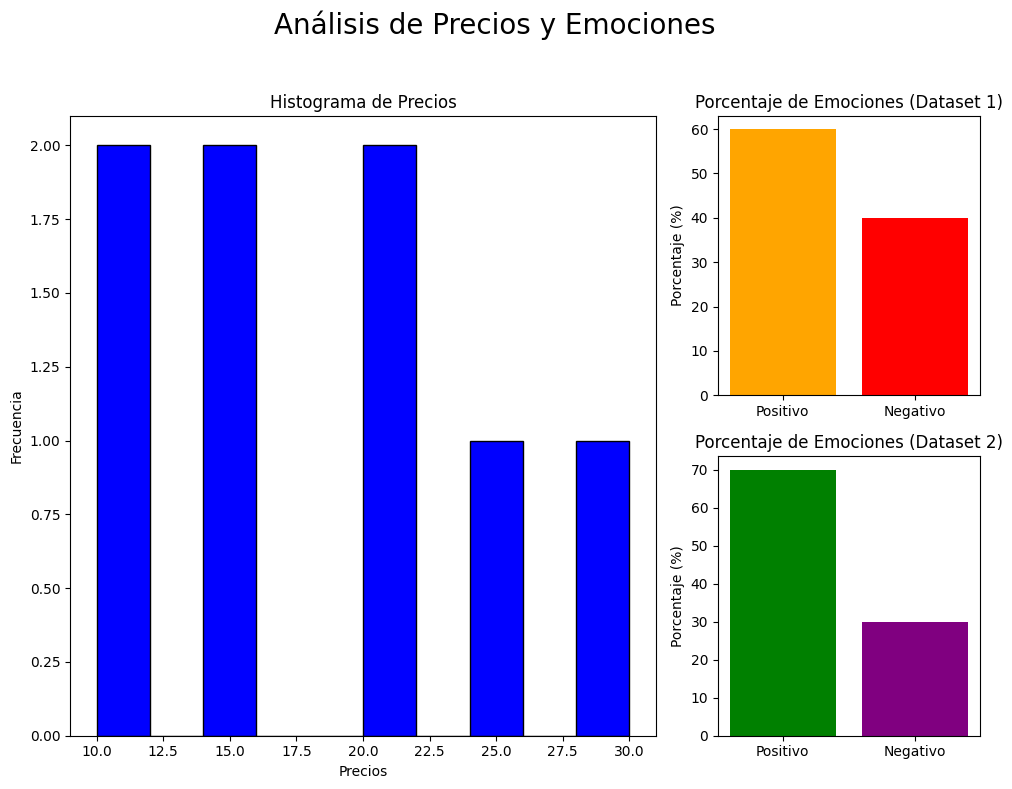

In [ ]:
def displayR(prices, emotions1, emotions2):
    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    fig = plt.figure(figsize=(10, 8))
    grid = GridSpec(4, 6, figure=fig)

    fig.suptitle("Análisis de Precios y Emociones", fontsize=20)

    ax1 = fig.add_subplot(grid[0:4, 0:4])
    ax1.set_title("Histograma de Precios")
    ax1.hist(prices, bins=10, color="blue", edgecolor="black")
    ax1.set_xlabel("Precios")
    ax1.set_ylabel("Frecuencia")

    ax2 = fig.add_subplot(grid[0:2, 4:6])
    ax2.set_title("Porcentaje de Emociones (Dataset 1)")
    ax2.bar(
        ["Positivo", "Negativo"],
        [emotions1["positive"], emotions1["negative"]],
        color=["orange", "red"],
    )
    ax2.set_ylabel("Porcentaje (%)")

    ax3 = fig.add_subplot(grid[2:4, 4:6])
    ax3.set_title("Porcentaje de Emociones (Dataset 2)")
    ax3.bar(
        ["Positivo", "Negativo"],
        [emotions2["positive"], emotions2["negative"]],
        color=["green", "purple"],
    )
    ax3.set_ylabel("Porcentaje (%)")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


prices = [10, 20, 15, 30, 25, 10, 15, 20]
emotions1 = {"positive": 60, "negative": 40}  # Dataset 1
emotions2 = {"positive": 70, "negative": 30}  # Dataset 2

displayR(prices, emotions1, emotions2)



In [10]:
def getLinksAmazon(product_name):
    import requests
    from bs4 import BeautifulSoup
    from user_agent import generate_user_agent
    import csv

    url = "https://www.amazon.com.mx/s"  # URL de búsqueda en Amazon México

    # Parámetros para la búsqueda
    params = {
        'k': product_name  # Término de búsqueda, en este caso "freidora"
    }

    # Encabezados personalizados
    custom_headers = {
        'user-agent': generate_user_agent(),  # Generar un User-Agent aleatorio
        'accept-language': 'en-GB,en;q=0.9', # Mejorar los headers
    }

    # Lista para almacenar los enlaces y precios de los productos
    products = []
    num_products = 500  # Número de productos a recolectar
    current_url = url  # URL inicial para comenzar la búsqueda

    while len(products) < num_products:
        try:
            response = requests.get(current_url, params=params, headers=custom_headers)

            # Comprobamos que la solicitud fue exitosa
            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')

                # Imprimir el título de la página
                page_title = soup.title.string.strip() if soup.title else "Sin título"
                print(f"Visitando página: {page_title}")

                # Encontrar enlaces de productos con la clase especificada
                product_links = soup.find_all(
                    "a", 
                    class_="a-link-normal s-line-clamp-4 s-link-style a-text-normal"
                )

                # Encontrar precios de los productos
                product_prices = soup.find_all("span", class_="a-price-whole")

                for product, price in zip(product_links, product_prices):
                    if len(products) >= num_products:
                        break

                    link = "https://www.amazon.com.mx" + product['href']
                    price_text = price.get_text(strip=True).replace(".", "")  # Limpiar el precio
                    products.append({"link": link, "price": price_text})

                # Buscar enlace de la siguiente página
                next_page = soup.find("a", class_="s-pagination-item s-pagination-next s-pagination-button s-pagination-button-accessibility s-pagination-separator")

                if next_page and 'href' in next_page.attrs:
                    current_url = "https://www.amazon.com.mx" + next_page['href']
                else:
                    print("No hay más páginas disponibles o ya se han recolectado todos los productos.")
                    break

            else:
                print(f"Error al acceder a la página. Código de estado: {response.status_code}")
                return None

        except Exception as e:
            print(f"Ocurrió un error al intentar acceder a la página: {e}")
            return None

    # Guardar los datos en un archivo CSV
    with open("productos.csv", "w", newline="", encoding="utf-8") as csvfile:
        fieldnames = ["link", "price"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        writer.writerows(products)

    print("Datos guardados en productos.csv")
    return products

getLinksAmazon("freidora")

Visitando página: Amazon.com.mx : freidora
Visitando página: Amazon.com.mx : freidora
Visitando página: Amazon.com.mx : freidora
Visitando página: Amazon.com.mx : freidora
Visitando página: Amazon.com.mx : freidora
Visitando página: Amazon.com.mx : freidora
Visitando página: Amazon.com.mx : freidora
No hay más páginas disponibles o ya se han recolectado todos los productos.
Datos guardados en productos.csv


[{'link': 'https://www.amazon.com.mx/sspa/click?ie=UTF8&spc=MTozMTY1NjcwNTM1MTI4MjcwOjE3MzU3ODEwNDc6c3BfYXRmOjMwMDUyODI2ODQwOTAwMjo6MDo6&url=%2FChefman-lavaplatos-alimentos-saludables-temporizador%2Fdp%2FB09NZQ7X1Q%2Fref%3Dsr_1_1_sspa%3Fdib%3DeyJ2IjoiMSJ9.XceA4Av-RZWrx5VUwmEhF0XBm0kKsGHe_uG_6AsjrWAoYxtS9-gKhWEw9-I4J3zxi8MfGgQnQZqRrhWRTuxlq9fECILgjpWhJjaIqIi0Ueykw4C2tQKQHHwB8hPU4cz4g01eNR-waYjkCNvuuLZGApRdg1TzM0P1HXkgDV7JQmw4HjQtyPtPSMOwVnfAox6XH-4AgRkqVr5tw22uRDbaT_qJGe2dOrQ45_kBukNl5wAb-ql9pa4C26AJQY4zQGIVBhkesKLzdiTaBWeHitwKxDuI7E81V_aNcXAnD-ouJ70.0K3VrjxXvH5hYmWuHU-yw4hHpWc4QiFemNPzKPYiIvI%26dib_tag%3Dse%26keywords%3Dfreidora%26qid%3D1735781047%26sr%3D8-1-spons%26ufe%3Dapp_do%253Aamzn1.fos.de93fa6a-174c-4df7-be7c-5bc8e9c5a71b%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
  'price': '899'},
 {'link': 'https://www.amazon.com.mx/Hamilton-Beach-35210-Profesional-Inoxidable/dp/B08YMWQF2X/ref=sr_1_2?dib=eyJ2IjoiMSJ9.XceA4Av-RZWrx5VUwmEhF0XBm0kKsGHe_uG_6AsjrWAoYxtS9-gKhWEw9-I4J3zxi8MfGgQn

In [8]:
def getLinksAmazon(product_name):
    import requests
    from bs4 import BeautifulSoup
    from user_agent import generate_user_agent

    url = "https://www.amazon.com.mx/s"  # URL de búsqueda en Amazon México

    # Parámetros para la búsqueda
    params = {
        'k': product_name  # Término de búsqueda, en este caso "freidora"
    }

    # Encabezados personalizados
    custom_headers = {
        'user-agent': generate_user_agent(),  # Generar un User-Agent aleatorio
        'accept-language': 'en-GB,en;q=0.9', # Mejorar los headers
    }

    # Lista para almacenar los enlaces de los productos
    product_links_list = []
    num_products = 500  # Número de productos a recolectar
    current_url = url  # URL inicial para comenzar la búsqueda

    while len(product_links_list) < num_products:
        try:
            response = requests.get(current_url, params=params, headers=custom_headers)

            # Comprobamos que la solicitud fue exitosa
            if response.status_code == 200:
                soup = BeautifulSoup(response.text, 'html.parser')

                # Imprimir el título de la página
                page_title = soup.title.string.strip() if soup.title else "Sin título"
                print(f"Visitando página: {page_title}")

                # Encontrar enlaces de productos con la clase especificada
                product_links = soup.find_all(
                    "a", 
                    class_="a-link-normal s-line-clamp-4 s-link-style a-text-normal"
                )

                for product in product_links:
                    if len(product_links_list) >= num_products:
                        break

                    link = "https://www.amazon.com.mx" + product['href']
                    product_links_list.append(link)

                # Buscar enlace de la siguiente página
                next_page = soup.find("a", class_="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator")

                if next_page and 'href' in next_page.attrs:
                    current_url = "https://www.amazon.com.mx" + next_page['href']
                else:
                    print("No hay más páginas disponibles o ya se han recolectado todos los productos.")
                    return product_links_list

            else:
                print(f"Error al acceder a la página. Código de estado: {response.status_code}")
                return None

        except Exception as e:
            print(f"Ocurrió un error al intentar acceder a la página: {e}")
            return None

    return product_links_list



product_links_list = getLinksAmazon("freidora")
# Imprimir los enlaces de productos recolectados
print(f"Total de enlaces recolectados: {len(product_links_list)}")
for link in product_links_list:
    print(link)


Visitando página: Amazon.com.mx : freidora
No hay más páginas disponibles o ya se han recolectado todos los productos.
Total de enlaces recolectados: 60
https://www.amazon.com.mx/sspa/click?ie=UTF8&spc=MTo1ODY3MDQxMjc1MzczOTk5OjE3MzU3Nzc0NjE6c3BfYXRmOjMwMDUyODI2ODQwOTAwMjo6MDo6&url=%2FChefman-lavaplatos-alimentos-saludables-temporizador%2Fdp%2FB09NZQ7X1Q%2Fref%3Dsr_1_1_sspa%3Fdib%3DeyJ2IjoiMSJ9.XceA4Av-RZWrx5VUwmEhF0XBm0kKsGHe_uG_6AsjrWB9POTmCk6g_DKmUrSf-JySs2cXHdVD82xnuM0Xm6t7QdoqZSGRdTyW13v9JZdD2-ALozEsnLCJMWUCcxnc0caEz4VGh6AmRg50kwk9Xx62MZRdg1TzM0P1HXkgDV7JQmz6gJXMNxtZbc4kGTmoUM-01FnnhkbziFv6ffMp7m7TyfqJGe2dOrQ45_kBukNl5wAb-ql9pa4C26AJQY4zQGIVBhkesKLzdiTaBWeHitwKxDuI7E81V_aNcXAnD-ouJ70.nKNA3dKOJrkXnWCS8RBLIt3PKNZWAV0iRDrTtxnvTpU%26dib_tag%3Dse%26keywords%3Dfreidora%26qid%3D1735777461%26sr%3D8-1-spons%26ufe%3Dapp_do%253Aamzn1.fos.de93fa6a-174c-4df7-be7c-5bc8e9c5a71b%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1
https://www.amazon.com.mx/Hamilton-Beach-35210-Profesional-Inoxidable/dp/B

In [4]:
def getUserNPassword():
    import csv
    with open('notYourBusiness.csv', mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row.get('status') == '0':
                row.get('id') == 1
                return row.get('id'), row.get('u'), row.get('p')
    return None, None

In [6]:
def notNow(driver, wait):
    # Verificar si estamos en la página de inicio de sesión
    if "Iniciar sesión" in driver.title:
        print("Redirigido a la página de inicio de sesión.")
        
        # Ingresar el correo electrónico
        email_input = wait.until(EC.presence_of_element_located((By.ID, "ap_email")))
        email_input.send_keys(email)
        email_input.send_keys(Keys.RETURN)
        
        # Ingresar la contraseña
        password_input = wait.until(EC.presence_of_element_located((By.ID, "ap_password")))
        password_input.send_keys(password)
        password_input.send_keys(Keys.RETURN)
        print("Inicio de sesión exitoso.")
        # Esperar a que se redirija de nuevo a la página original después de iniciar sesión
        time.sleep(3)


In [14]:
def getUserNPassword():
    import csv
    # Leer y modificar en memoria
    with open('notYourBusiness.csv', mode='r', newline='') as file:
        rows = list(csv.DictReader(file))
    
    # Buscar la primera fila con status '0'
    for row in rows:
        if row['status'] == '0':
            row['status'] = '1'  # Cambiar status a '1'
            # Guardar cambios y devolver datos del usuario
            with open('notYourBusiness.csv', mode='w', newline='') as file:
                writer = csv.DictWriter(file, fieldnames=row.keys())
                writer.writeheader()
                writer.writerows(rows)

            return row['id'], row['u'], row['p']

    # Si no hay usuarios con status '0', devolver None
    return None, None, None

getUserNPassword()

('0', ' awsgcds@gmail.com', 'GaC5rP6WXycRJPm')

In [11]:
    
def AmazonReviews(sublistAmazonReviews, lock):
    import random
    import time
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    from selenium.webdriver.common.keys import Keys
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    import user_agent

    def getUserNPassword():
        import csv
        import random

        # Leer y modificar en memoria
        with open('notYourBusiness.csv', mode='r', newline='') as file:
            rows = list(csv.DictReader(file))

        # Filtrar filas con status '0' y seleccionar una al azar
        rows_with_status_0 = [row for row in rows if row['status'] == '0']
        if rows_with_status_0:
            selected_row = random.choice(rows_with_status_0)

            # Cambiar el estado de la fila seleccionada a '1' en la lista original
            for row in rows:
                if row['id'] == selected_row['id']:  # Matching by unique 'id' to update correct row
                    row['status'] = '1'
                    break

            # Guardar cambios en el archivo
            with open('notYourBusiness.csv', mode='w', newline='') as file:
                writer = csv.DictWriter(file, fieldnames=rows[0].keys())
                writer.writeheader()
                writer.writerows(rows)

            # Devolver datos del usuario seleccionado
            return selected_row['id'], selected_row['u'], selected_row['p']

        # Si no hay filas con status '0'
        return None, None, None

    def LogInAmazon(driver, wait, email, password):
        # Verificar si estamos en la página de inicio de sesión
        if "Iniciar sesión" in driver.title:
            print("Redirigido a la página de inicio de sesión.")
            
            # Ingresar el correo electrónico
            email_input = wait.until(EC.presence_of_element_located((By.ID, "ap_email")))
            email_input.send_keys(email)
            email_input.send_keys(Keys.RETURN)
            
            # Espera aleatoria
            time.sleep(random.uniform(1, 3))
            
            # Ingresar la contraseña
            password_input = wait.until(EC.presence_of_element_located((By.ID, "ap_password")))
            password_input.send_keys(password)
            password_input.send_keys(Keys.RETURN)
            print("Inicio de sesión exitoso.")
            
            # Espera aleatoria para redirección después de inicio de sesión
            time.sleep(random.uniform(1, 3))

    def initialize_browser():
        # Configurar opciones para el navegador
        options = webdriver.ChromeOptions()
        
        # Establecer un User-Agent explícito para evitar conflictos
        user_agent_string = user_agent.generate_user_agent()
        options.add_argument(f"user-agent={user_agent_string}")
        
        # Argumentos adicionales
        options.add_argument("--no-first-run")
        options.add_argument("--no-default-browser-check")
        options.add_argument("--disable-extensions")  # Desactiva extensiones
        options.add_argument("--headless") 
        # Asegurarse de que Chrome no abra páginas adicionales al inicio
        options.add_experimental_option("excludeSwitches", ["enable-automation"])
        options.add_experimental_option("useAutomationExtension", False)
        
        # Inicializar el navegador con las opciones configuradas
        driver = webdriver.Chrome(options=options)
        return driver

    def access_reviews_with_auto_login(product_url, lock):
        
        idU, email, password = getUserNPassword(lock)
        # Configurar opciones para el navegador
        options = webdriver.ChromeOptions()
        options.add_argument(user_agent.generate_user_agent())
        options.add_argument("accept=text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8")
        options.add_argument("accept-language=en-US,en;q=0.9")
        
        # Inicializar el navegador con las opciones configuradas
        driver = initialize_browser()
        wait = WebDriverWait(driver, 10)  # Espera explícita para elementos
        
        all_reviews = []  # Lista para almacenar todas las reseñas

        try:
            # Ir a la página del producto
            driver.get(product_url)
            time.sleep(random.uniform(1, 3))  # Espera aleatoria para que cargue la página
            
            # Comprobar si se necesita iniciar sesión en la página actual
            LogInAmazon(driver, wait, email, password)
            
            # Buscar y hacer clic en el enlace de "Ver más opiniones"
            see_all_reviews_link = wait.until(
                EC.presence_of_element_located((By.CSS_SELECTOR, 'a[data-hook="see-all-reviews-link-foot"]'))
            )
            see_all_reviews_link.click()
            print("Navegando a la página de opiniones.")
            
            # Espera aleatoria antes de verificar si es necesario iniciar sesión en la página de opiniones
            time.sleep(random.uniform(1, 3))
            
            # Comprobar si se necesita iniciar sesión en la página de opiniones
            LogInAmazon(driver, wait, email, password)
            
            # Navegar a través de las páginas de reseñas y recolectarlas
            while True:
                # Extraer reseñas de la página actual
                review_elements = wait.until(
                    EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'span[data-hook="review-body"]'))
                )
                for review in review_elements:
                    all_reviews.append(review.text)
                
                # Imprimir el título de la página actual
                print("Título de la página actual:", driver.title)
                
                # Espera aleatoria antes de navegar a la siguiente página
                time.sleep(random.uniform(1, 3))
                
                # Intentar encontrar el botón de "Página siguiente" en <li class="a-last">
                try:
                    next_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'li.a-last a')))
                    next_button.click()
                    print("Navegando a la siguiente página de reseñas.")
                    
                    # Espera aleatoria para cargar la página de reseñas
                    time.sleep(random.uniform(1, 3))
                except:
                    print("No hay más páginas disponibles o el botón 'Página siguiente' está deshabilitado.")
                    break
            lock.accuare()
            try:
                escribir opiniones en un csv
            lock realease 
            #print("Total de opiniones extraídas:", len(all_reviews))
            #print("Opiniones extraídas:", all_reviews)
            
        except Exception as e:
            print("Ocurrió un error:", e)
        
        finally:
            # Cerrar el navegador
            driver.quit()


        for product_url in sublistAmazonReviews:
            access_reviews_with_auto_login(product_url)

# Ejemplo de uso
product_url = product_links_list[0] # Enlace del producto
access_reviews_with_auto_login(product_url)


Navegando a la página de opiniones.
Redirigido a la página de inicio de sesión.
Inicio de sesión exitoso.
Título de la página actual: Amazon.com.mx:Opiniones de clientes: Bluelander Cobija Matrimonial, Franela de Alta Calidad, Frazada Cómoda y Calientita Tejido Suave y Cálido, Manta de 100% Poliéster Ultrasuave, Calidad Premium (1, Perla, Matrimonial)
Navegando a la siguiente página de reseñas.
Título de la página actual: Amazon.com.mx:Opiniones de clientes: Bluelander Cobija Matrimonial, Franela de Alta Calidad, Frazada Cómoda y Calientita Tejido Suave y Cálido, Manta de 100% Poliéster Ultrasuave, Calidad Premium (1, Perla, Matrimonial)
Navegando a la siguiente página de reseñas.
Título de la página actual: Amazon.com.mx:Opiniones de clientes: Bluelander Cobija Matrimonial, Franela de Alta Calidad, Frazada Cómoda y Calientita Tejido Suave y Cálido, Manta de 100% Poliéster Ultrasuave, Calidad Premium (1, Perla, Matrimonial)
Navegando a la siguiente página de reseñas.
Título de la págin

In [1]:
import re

def obtener_asin(url_producto):
    # Expresión regular para encontrar el ASIN en la URL
    patron_asin = r'/dp/([A-Z0-9]{10})'
    coincidencia = re.search(patron_asin, url_producto)
    if coincidencia:
        return coincidencia.group(1)
    else:
        raise ValueError("No se encontró un ASIN válido en la URL proporcionada.")

def construir_url_resenas(url_producto):
    patron_asin = r'/dp/([A-Z0-9]{10})'
    coincidencia = re.search(patron_asin, url_producto)
    if coincidencia:
        return coincidencia.group(1)
    else:
        raise ValueError("No se encontró un ASIN válido en la URL proporcionada.")
    # Construir la URL de reseñas utilizando el ASIN
    url_resenas = f"https://www.amazon.com.mx/product-reviews/{asin}/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
    return url_resenas

# URL del producto
url_producto = "https://www.amazon.com.mx/Apple-iPhone-128-GB-Morado-Reacondicionado/dp/B0BNLSZ1TR/ref=sr_1_7?dib=eyJ2IjoiMSJ9.BBJHQihjWg-6vvKOzjQbdU6aDJi9u4a3ggJU92WkeQ8xUxjuZi4lqGYEeMJNVKbJyFb5rt3cIYqXlxsdUx4s26xJA7a-gdlfR8E1Ol6Zrv5v12fLKjM817s_OUI4_lShdUhmCAvkVdlYQc461oc5cVTppismY63CBBeNyu-5vuIB6DbHAJm0Fl7K6GjRt8l4Drm67oEm497uGKReTJ1Hqxnhn5Ua8yxst3kqx6x8xpUY6U25G8LXAwHRgZfZ7Vu5WUp8dBkoq1-HsUP4w-NYs_bpZCxkRGopvkEmA3xXoMA.KPyPxKXsi3ctMNpEZzbe2wV9Y180lkqVazQ0KCRXBzA&dib_tag=se&keywords=iphone%2B15%2Bpro%2Bmax&qid=1731606720&sr=8-7&th=1"

try:
    asin = obtener_asin(url_producto)
    url_resenas = construir_url_resenas(asin)
    print(f"ASIN: {asin}")
    print(f"URL de reseñas: {url_resenas}")
except ValueError as e:
    print(e)


ASIN: B0BNLSZ1TR
URL de reseñas: https://www.amazon.com.mx/product-reviews/B0BNLSZ1TR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
